In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [19]:
x=pd.read_csv("Desktop/3D_spatial_network.csv")

In [20]:
print(x.shape)
x=x.values

(434873, 4)


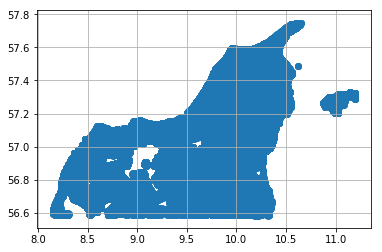

In [21]:
plt.scatter(x[:,1],x[:,2])
plt.grid(True)
plt.show()

In [129]:
k=5

colors=['red','green','blue','yellow','pink']
clusters={}

for i in range(k):
    center=10.5+2*(np.random.random((x.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'color':colors[i],
        'points':points
        
    }
    
    clusters[i]=cluster
    

In [130]:
for i in range(len(clusters)):
    print(clusters[i])

{'center': array([8.80086317, 9.14637574, 9.97015257, 9.9696419 ]), 'color': 'red', 'points': []}
{'center': array([9.13006051, 8.55719601, 9.81263309, 9.18758603]), 'color': 'green', 'points': []}
{'center': array([8.86110148, 9.34316346, 8.78914471, 9.71033723]), 'color': 'blue', 'points': []}
{'center': array([8.76796566, 9.97959862, 9.80557709, 9.3261324 ]), 'color': 'yellow', 'points': []}
{'center': array([ 8.89471892, 10.37237008, 10.38392013,  9.82516999]), 'color': 'pink', 'points': []}


In [131]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [132]:
print(distance(x[0],x[1]))

for kx in range(k):
    clusters[kx]['center'][2] = 56.6+0.3*kx
    
for i in range(len(clusters)):
    print(clusters[i])    
    

0.4686955574881966
{'center': array([ 8.80086317,  9.14637574, 56.6       ,  9.9696419 ]), 'color': 'red', 'points': []}
{'center': array([ 9.13006051,  8.55719601, 56.9       ,  9.18758603]), 'color': 'green', 'points': []}
{'center': array([ 8.86110148,  9.34316346, 57.2       ,  9.71033723]), 'color': 'blue', 'points': []}
{'center': array([ 8.76796566,  9.97959862, 57.5       ,  9.3261324 ]), 'color': 'yellow', 'points': []}
{'center': array([ 8.89471892, 10.37237008, 57.8       ,  9.82516999]), 'color': 'pink', 'points': []}


In [133]:
def assign_points_to_clusters(clusters):
    for i in range(x.shape[0]):
        dist=[]
        current_point=x[i]
    
        for kx in range(k):
            distance_of_this_point_from_this_cluster_center=distance(current_point[1:3],clusters[kx]['center'][1:3])
            dist.append(distance_of_this_point_from_this_cluster_center)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(current_point)

In [134]:
def plot_clusters(clusters):
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        # plot the points
        try:
            plt.scatter(pts[:,1],pts[:,2],color=clusters[kx]['color'])
        except:
            pass
    
        # plot the center of the clusters
        uk=clusters[kx]['center']
        plt.scatter(uk[1],uk[2],color="black",marker="*")
    

In [140]:
def update_clusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center=pts.mean(axis=0)
            #print(new_center.shape)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]
            
            
        

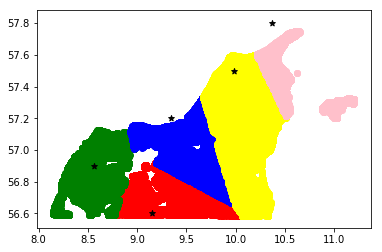

In [136]:
assign_points_to_clusters(clusters)
plot_clusters(clusters)

In [137]:
for i in range(k):
    print(len(clusters[i]['points']))

55181
62750
77176
178759
61007


In [138]:
#assign_points_to_clusters(clusters)
#plot_clusters(clusters)
update_clusters(clusters)

(4,)
(4,)
(4,)
(4,)
(4,)


(4,)
(4,)
(4,)
(4,)
(4,)
Time:  38.882008493827016


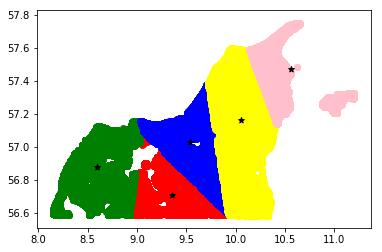

In [139]:
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plot_clusters(clusters)
update_clusters(clusters)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  28.428409679012475


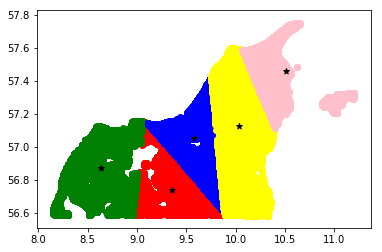

In [141]:
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plot_clusters(clusters)
update_clusters(clusters)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  27.978917135802476


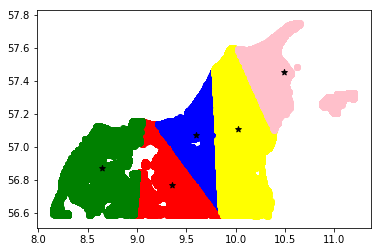

In [142]:
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plot_clusters(clusters)
update_clusters(clusters)
stop = timeit.default_timer()
print('Time: ', stop - start) 